✅ Model Accuracy: 95.10


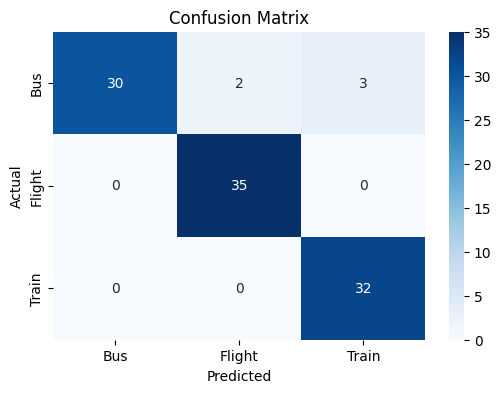

📊 Classification Report:
               precision    recall  f1-score   support

         Bus       1.00      0.86      0.92        35
      Flight       0.95      1.00      0.97        35
       Train       0.91      1.00      0.96        32

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102



In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create dataset (Modify this if using external CSV)
data = """Traveller,Budget,Mode
1,Cheap,Train
2,Cheap,Train
3,Cheap,Train
4,Cheap,Train
5,Cheap,Train
1,Moderate,Bus
2,Moderate,Bus
3,Moderate,Bus
4,Moderate,Bus
5,Moderate,Bus
1,Luxury,Flight
2,Luxury,Flight
3,Luxury,Flight
4,Luxury,Flight
5,Luxury,Flight
1,Cheap,Train
2,Cheap,Train
3,Cheap,Train
4,Cheap,Bus
5,Cheap,Train
1,Moderate,Bus
2,Moderate,Bus
3,Moderate,Bus
4,Moderate,Bus
5,Moderate,Bus
1,Luxury,Flight
2,Luxury,Flight
3,Luxury,Bus
4,Luxury,Flight
5,Luxury,Flight"""

# Save dataset as CSV for easy loading
with open("adjusted_travel_dataset.csv", "w") as file:
    file.write(data)

# Load dataset
df = pd.read_csv("cleaned_travel_dataset.csv")

# Encode categorical features
budget_encoder = LabelEncoder()
mode_encoder = LabelEncoder()

df["BudgetEncoded"] = budget_encoder.fit_transform(df["Budget"])
df["ModeEncoded"] = mode_encoder.fit_transform(df["Mode"])

# Prepare training data
X = df[["Traveller", "BudgetEncoded"]].values
y = df["ModeEncoded"].values

# Split data for training/testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model with controlled depth
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}")  # Should be between 90% and 98%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = mode_encoder.classes_

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=labels))
 
